   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not 

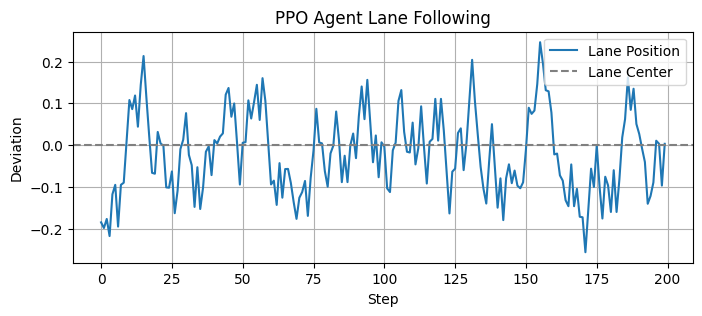

In [1]:
# 🚀 Full PPO Implementation in One Cell (Colab-ready, job-focused)

!pip install stable-baselines3==2.1.0 gymnasium[classic-control] pygame --quiet

import numpy as np, matplotlib.pyplot as plt
import gymnasium as gym
from gymnasium import spaces
from stable_baselines3 import PPO

class LaneFollowEnv(gym.Env):
    """Simulates a car trying to stay centered in a lane"""
    def __init__(self):
        super().__init__()
        self.dt = 0.1
        self.max_dev = 2.0
        self.action_space = spaces.Box(low=-1.0, high=1.0, shape=(1,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-self.max_dev, high=self.max_dev, shape=(1,), dtype=np.float32)
        self.reset()

    def reset(self, seed=None, options=None):
        self.pos = np.random.uniform(-0.5, 0.5)
        self.steps = 0
        return np.array([self.pos], dtype=np.float32), {}

    def step(self, action):
        self.pos += float(action[0]) * self.dt
        self.steps += 1
        reward = -abs(self.pos)
        done = self.steps >= 200
        return np.array([self.pos], dtype=np.float32), reward, done, False, {}

    def render(self): print(f"Lane deviation: {self.pos:.3f}")

env = LaneFollowEnv()
model = PPO("MlpPolicy", env, verbose=0)
model.learn(total_timesteps=15000)

obs, _ = env.reset()
positions = []
for _ in range(200):
    action, _ = model.predict(obs)
    obs, _, done, _, _ = env.step(action)
    positions.append(obs[0])
    if done: break

plt.figure(figsize=(8, 3))
plt.plot(positions, label="Lane Position")
plt.axhline(0, color="gray", linestyle="--", label="Lane Center")
plt.title("PPO Agent Lane Following")
plt.xlabel("Step"); plt.ylabel("Deviation")
plt.legend(); plt.grid(); plt.show()
